In [1]:
!pip install mpl_finance

In [2]:
import pandas as pd,numpy as np,yfinance as yf,matplotlib.pyplot as plt,matplotlib.dates as mdates
from datetime import datetime
from mpl_finance import candlestick_ohlc
import warnings
warnings.filterwarnings('ignore')
import os

In [3]:
# Download data for S&P500 (^GSPC) stock
sp500 = yf.download("^GSPC", start="2020-01-01", end=datetime.today())

[*********************100%%**********************]  1 of 1 completed


In [4]:
df = pd.DataFrame(sp500)

### EDA

In [5]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,3244.669922,3258.139893,3235.530029,3257.850098,3257.850098,3459930000
2020-01-03,3226.360107,3246.149902,3222.340088,3234.850098,3234.850098,3484700000
2020-01-06,3217.550049,3246.840088,3214.639893,3246.280029,3246.280029,3702460000
2020-01-07,3241.860107,3244.909912,3232.429932,3237.179932,3237.179932,3435910000
2020-01-08,3238.590088,3267.070068,3236.669922,3253.050049,3253.050049,3726840000
...,...,...,...,...,...,...
2023-09-26,4312.879883,4313.009766,4265.979980,4273.529785,4273.529785,3472340000
2023-09-27,4282.629883,4292.069824,4238.629883,4274.509766,4274.509766,3875880000
2023-09-28,4269.649902,4317.270020,4264.379883,4299.700195,4299.700195,3846230000


In [6]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-09-26,4312.879883,4313.009766,4265.979980,4273.529785,4273.529785,3472340000
2023-09-27,4282.629883,4292.069824,4238.629883,4274.509766,4274.509766,3875880000
2023-09-28,4269.649902,4317.270020,4264.379883,4299.700195,4299.700195,3846230000
2023-09-29,4328.180176,4333.149902,4274.859863,4288.049805,4288.049805,3865960000
2023-10-02,4284.520020,4295.750000,4274.680176,4278.069824,4278.069824,584988504


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 944 entries, 2020-01-02 to 2023-10-02
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       944 non-null    float64
 1   High       944 non-null    float64
 2   Low        944 non-null    float64
 3   Close      944 non-null    float64
 4   Adj Close  944 non-null    float64
 5   Volume     944 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 51.6 KB


In [8]:
# Check for missing values
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [9]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,944.000000,944.000000,944.000000,944.000000,944.000000,9.440000e+02
mean,3933.512812,3959.182404,3905.998281,3933.960976,3933.960976,4.529178e+09
std,522.104800,519.624898,525.111281,522.205565,522.205565,1.086396e+09
min,2290.709961,2300.729980,2191.860107,2237.399902,2237.399902,5.849885e+08
25%,3638.624939,3671.319946,3609.032410,3639.332458,3639.332458,3.838965e+09
50%,4014.280029,4047.375000,3982.150024,4016.584961,4016.584961,4.269915e+09
75%,4361.555054,4384.649902,4329.482422,4359.602417,4359.602417,4.886595e+09
max,4804.509766,4818.620117,4780.040039,4796.560059,4796.560059,9.976520e+09


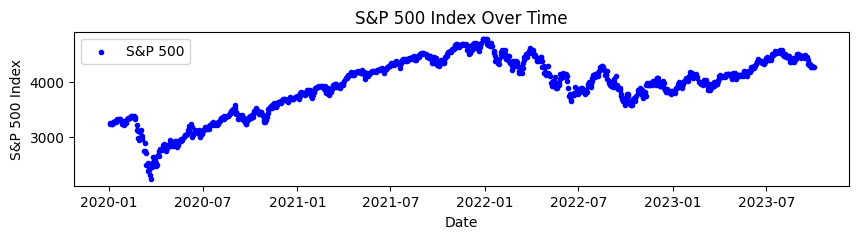

In [10]:
plt.figure(figsize=(10, 2))
plt.scatter(df.index, df['Close'], marker='.', color='blue', label='S&P 500')
plt.xlabel('Date')
plt.ylabel('S&P 500 Index')
plt.title('S&P 500 Index Over Time')
plt.legend()
plt.show()

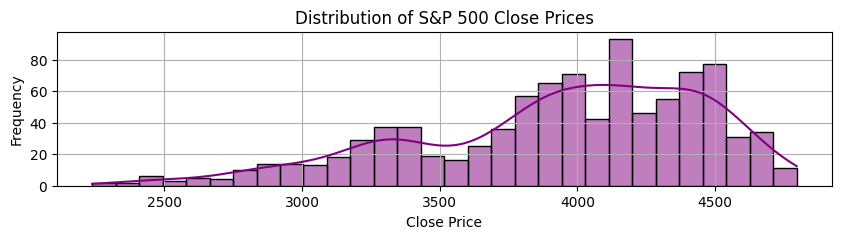

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 2))  # Adjust the figsize for better visibility
sns.histplot(df['Close'], bins=30, color='purple', kde=True)
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.title('Distribution of S&P 500 Close Prices')
plt.grid(True)
plt.show()

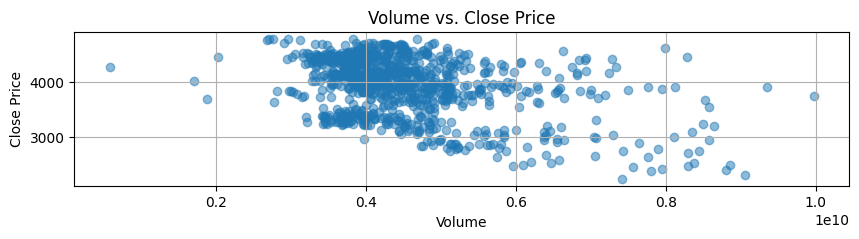

In [12]:
plt.figure(figsize=(10, 2))
plt.scatter(df['Volume'], df['Close'], alpha=0.5)
plt.xlabel('Volume')
plt.ylabel('Close Price')
plt.title('Volume vs. Close Price')
plt.grid(True)
plt.show()

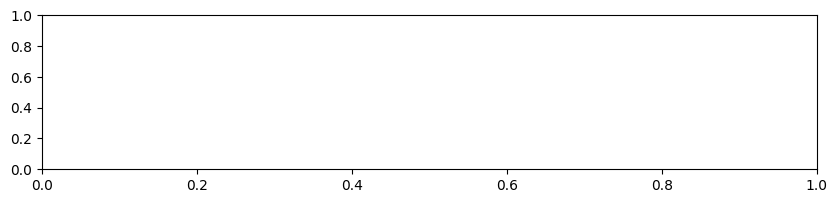

In [13]:
last_7_days = df.tail(30)
last_7_days=last_7_days.resample('d').ffill()
# Create a subplot
fig, ax = plt.subplots(figsize=(10,2))

In [14]:
# Convert the date index to numerical values
last_7_days['Date'] = mdates.date2num(last_7_days.index.to_pydatetime())

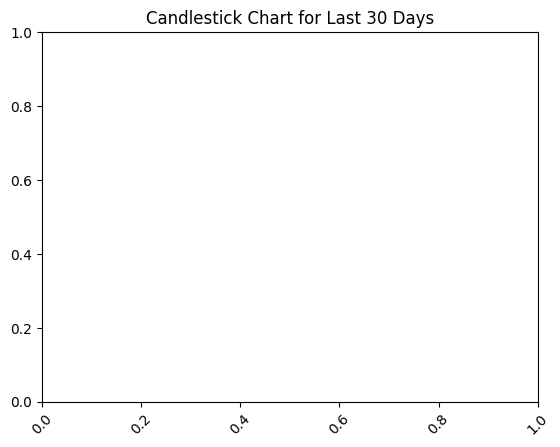

In [15]:
# Plot the candlestick chart
candlestick_ohlc(ax, last_7_days[['Date', 'Open', 'High', 'Low', 'Close']].values, width=0.2, colorup='g', colordown='r')

# Set axis labels
ax.set_xlabel('Date')
ax.set_ylabel('Price')

# Set the date format on the x-axis
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Rotate the x-axis labels for better readability

plt.xticks(rotation=45)

# Set the title
plt.title('Candlestick Chart for Last 30 Days')

# Show the plot
plt.show()

# Linear Regression Model:

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

# Define your features (X) and target (y)
X = df.drop(columns=["Close","Adj Close"], axis=1)
y = df["Close"]

# Define the split point (e.g., 80% of the data for training)
split_point = int(0.8* len(df))

# Split the data into training and testing sets
X_train, X_test = X[:split_point], X[split_point:]
y_train, y_test = y[:split_point], y[split_point:]

# Initialize and train the model
model = LinearRegression()
model.fit(X_train.values, y_train.values)

# Make predictions
y_pred = model.predict(X_test.values)

# Evaluate the model
mse = sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {mse}")

accuracy = r2_score(y_test, y_pred)
print(f"Accuracy : {round(accuracy * 100,2)}% ")

#Predicting the closing price of next day
predicted_price = model.predict(X_test.iloc[-1:])
print(f"Predicted Price for the next day : {predicted_price[0]}\n")

Root Mean Squared Error: 12.536330397975957
Accuracy : 99.64% 
Predicted Price for the next day : 4283.782552453184



In [17]:
import statsmodels.api as sm
import pylab as py

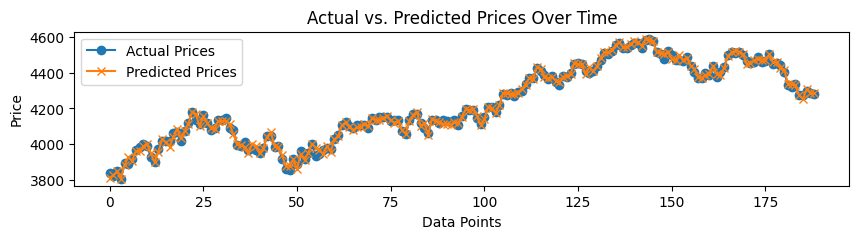

In [18]:
plt.figure(figsize=(10, 2))
plt.plot(range(len(y_test)), y_test, label="Actual Prices", marker='o')
plt.plot(range(len(y_test)), y_pred, label="Predicted Prices", marker='x',)
plt.xlabel("Data Points")
plt.ylabel("Price")
plt.legend()
plt.title("Actual vs. Predicted Prices Over Time")
plt.show()


### Evaluation and Optimization for Regression Model (Example: Linear Regression)

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
# Define a grid of hyperparameters to search over
param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0]}

# Initialize the Ridge regression model
ridge_model = Ridge()

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(ridge_model, param_grid, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_alpha = grid_search.best_params_['alpha']

# Initialize and train the model with the best hyperparameters
optimized_ridge_model = Ridge(alpha=best_alpha)
optimized_ridge_model.fit(X_train, y_train)

# Make predictions with the optimized model
y_pred_optimized = optimized_ridge_model.predict(X_test)

# Calculate MSE and R-squared for the optimized model
mse_optimized = sqrt(mean_squared_error(y_test, y_pred_optimized))
r2_optimized = r2_score(y_test, y_pred_optimized)

print(f"Optimized Root Mean Squared Error (RMSE): {mse_optimized}")
print(f"Optimized R-squared (R2): {r2_optimized*100}")

Optimized Root Mean Squared Error (RMSE): 12.536330373900304
Optimized R-squared (R2): 99.6428718023966


### Random Forest Regressor

In [20]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

# Initialize and train the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=8)
model.fit(X_train.values, y_train.values)

# Make predictions
y_pred = model.predict(X_test.values)

# Evaluate the model
mse = sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {mse}")

accuracy = r2_score(y_test, y_pred)
print(f"Accuracy : {round(accuracy * 100,2)}% ")

# Assuming you have new data for prediction
predicted_price = model.predict(X_test.iloc[-1:])
print(f"Predicted Price for the next day : {predicted_price[0]}\n")

Root Mean Squared Error: 16.38717678706747
Accuracy : 99.39% 
Predicted Price for the next day : 4288.508813476563



In [21]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,3244.669922,3258.139893,3235.530029,3257.850098,3257.850098,3459930000
2020-01-03,3226.360107,3246.149902,3222.340088,3234.850098,3234.850098,3484700000
2020-01-06,3217.550049,3246.840088,3214.639893,3246.280029,3246.280029,3702460000
2020-01-07,3241.860107,3244.909912,3232.429932,3237.179932,3237.179932,3435910000
2020-01-08,3238.590088,3267.070068,3236.669922,3253.050049,3253.050049,3726840000
...,...,...,...,...,...,...
2023-09-26,4312.879883,4313.009766,4265.979980,4273.529785,4273.529785,3472340000
2023-09-27,4282.629883,4292.069824,4238.629883,4274.509766,4274.509766,3875880000
2023-09-28,4269.649902,4317.270020,4264.379883,4299.700195,4299.700195,3846230000


# XGBoost

In [22]:
import pandas as pd
import xgboost as xg
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

# Initialize and train the model
model = xg.XGBRFRegressor(objective ='reg:linear',n_estimators=400,random_state=42,max_depth=10,gamma=0.001)

model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {mse}")

accuracy = r2_score(y_test, y_pred)
print(f"Accuracy: {round(accuracy * 100, 2)}%")

# Predicting the closing price of the next day
predicted_price = model.predict(X_test.iloc[-1:])
print(f"Predicted Price for the next day: {predicted_price[0]}\n")

[14:59:43] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
Root Mean Squared Error: 16.73650208725166
Accuracy: 99.36%
Predicted Price for the next day: 4288.5703125



# Classification Model

In [23]:
sp500 = yf.Ticker("^GSPC")
sp500 = sp500.history(period="max")

In [24]:
date_index = pd.to_datetime(sp500.index)

date_index_without_timestamp = date_index.date

date_index_without_timestamp = pd.to_datetime(date_index_without_timestamp)
sp500.index=date_index_without_timestamp

<Axes: >

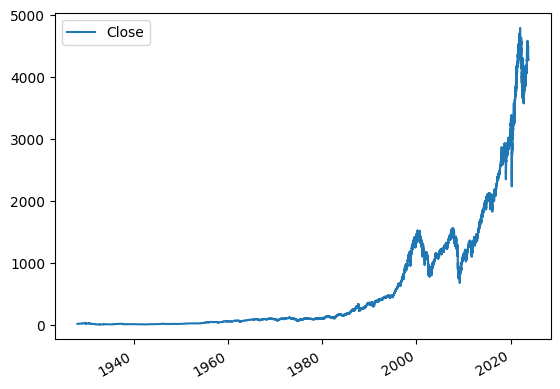

In [25]:
sp500.plot.line(y="Close", use_index=True)

In [26]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [27]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [28]:
sp500 = sp500.loc["1990-01-01":].copy()

In [29]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [30]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["Target"], preds)

0.5147058823529411

<Axes: >

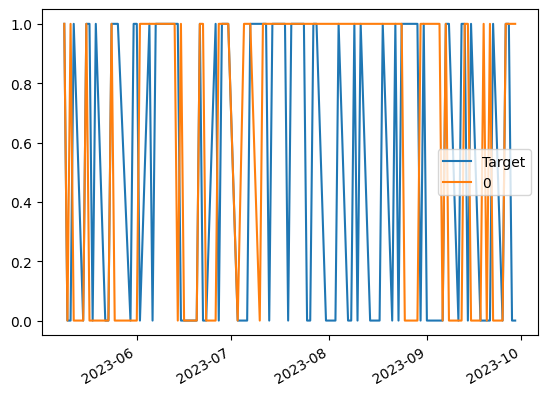

In [31]:
combined = pd.concat([test["Target"], preds], axis=1)
combined.plot()

In [32]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [33]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)

    return pd.concat(all_predictions)

In [34]:
predictions = backtest(sp500, model, predictors)

In [35]:
predictions["Predictions"].value_counts()

0    3437
1    2565
Name: Predictions, dtype: int64

In [36]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5282651072124757

In [37]:
predictions["Target"].value_counts() / predictions.shape[0]

1    0.533489
0    0.466511
Name: Target, dtype: float64

In [38]:
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()

    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]

    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]

    new_predictors+= [ratio_column, trend_column]

In [39]:
sp500 = sp500.dropna(subset=sp500.columns[sp500.columns != "Tomorrow"])

In [40]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
1993-12-14,465.730011,466.119995,462.459991,463.059998,275050000,0.0,0.0,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15,463.059998,463.690002,461.839996,461.839996,331770000,0.0,0.0,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16,461.859985,463.980011,461.859985,463.339996,284620000,0.0,0.0,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17,463.339996,466.380005,463.339996,466.380005,363750000,0.0,0.0,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20,466.380005,466.899994,465.529999,465.850006,255900000,0.0,0.0,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-25,4310.620117,4338.509766,4302.700195,4337.439941,3195650000,0.0,0.0,4273.529785,0,1.002007,1.0,0.993292,1.0,0.970427,30.0,1.053008,122.0,1.117666,531.0
2023-09-26,4312.879883,4313.009766,4265.979980,4273.529785,3472340000,0.0,0.0,4274.509766,1,0.992578,1.0,0.986356,1.0,0.956759,29.0,1.036861,122.0,1.100822,530.0
2023-09-27,4282.629883,4292.069824,4238.629883,4274.509766,3875880000,0.0,0.0,4299.700195,1,1.000115,1.0,0.992432,2.0,0.957625,29.0,1.036540,122.0,1.100696,531.0
2023-09-28,4269.649902,4317.270020,4264.379883,4299.700195,3846230000,0.0,0.0,4288.049805,0,1.002938,2.0,0.999687,3.0,0.963798,30.0,1.041983,123.0,1.106782,532.0


In [41]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [42]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >=.6] = 1
    preds[preds <.6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [43]:
predictions = backtest(sp500, model, new_predictors)

In [44]:
predictions["Predictions"].value_counts()

0.0    4179
1.0     823
Name: Predictions, dtype: int64

In [45]:
precision_score(predictions["Target"], predictions["Predictions"])

0.56865127582017

In [46]:
predictions["Target"].value_counts() / predictions.shape[0]

1    0.543183
0    0.456817
Name: Target, dtype: float64

In [47]:
predictions

,Target,Predictions
2003-11-14,0,0.0
2003-11-17,0,1.0
2003-11-18,1,1.0
2003-11-19,0,0.0
2003-11-20,1,1.0
...,...,...
2023-09-25,0,0.0
2023-09-26,1,0.0
2023-09-27,1,0.0
2023-09-28,0,0.0


In [48]:
from sklearn.metrics import confusion_matrix,classification_report

In [49]:
report=classification_report(predictions["Target"], predictions["Predictions"])

In [50]:
print(report)

              precision    recall  f1-score   support

           0       0.46      0.84      0.60      2285
           1       0.57      0.17      0.26      2717

    accuracy                           0.48      5002
   macro avg       0.52      0.51      0.43      5002
weighted avg       0.52      0.48      0.42      5002



In [51]:
cm=confusion_matrix(predictions["Target"], predictions["Predictions"])

In [52]:
cm

array([[1930,  355],
       [2249,  468]])

In [53]:
import seaborn as sns

In [54]:
class_labels=['Up','Down']

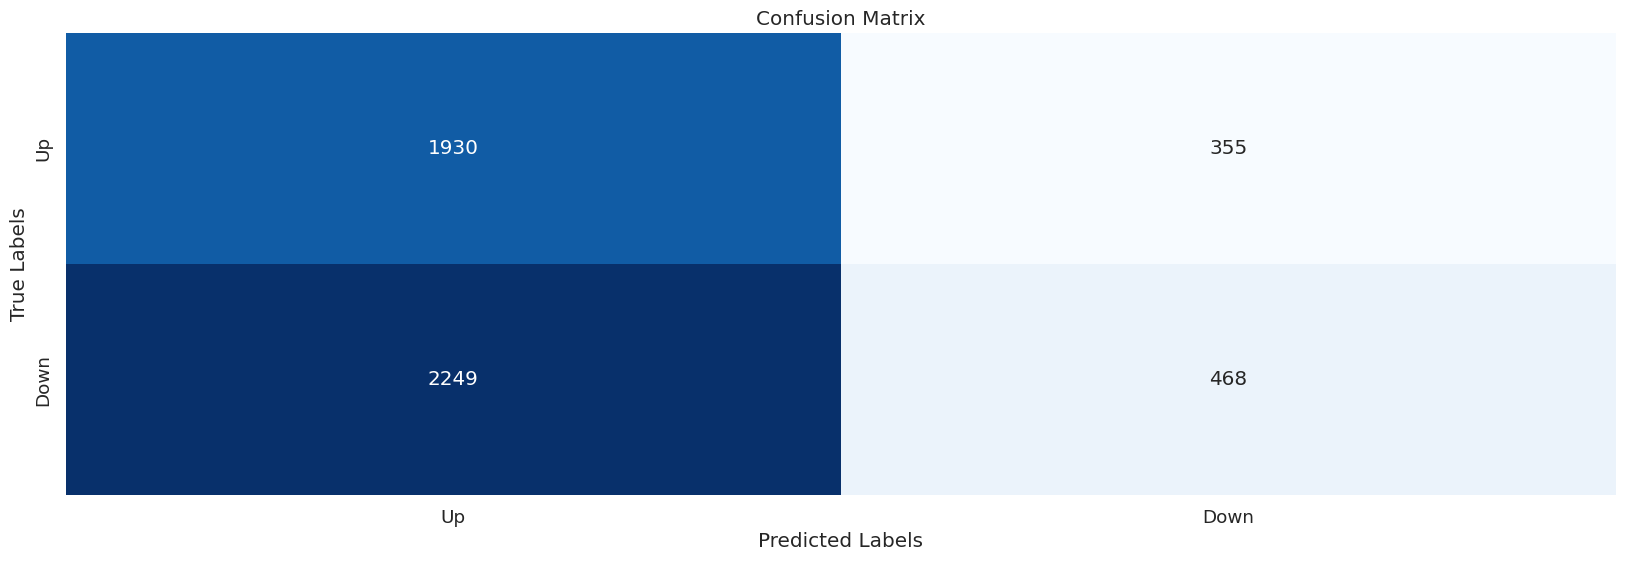

In [55]:
plt.figure(figsize=(20, 6))
sns.set(font_scale=1.2)  # Adjust font size for better readability
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_labels, yticklabels=class_labels)

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')


# Show the plot
plt.show()

# Time Series Analysis

In [56]:
# Time Series
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [57]:
y = df['Close'].resample("D").ffill()

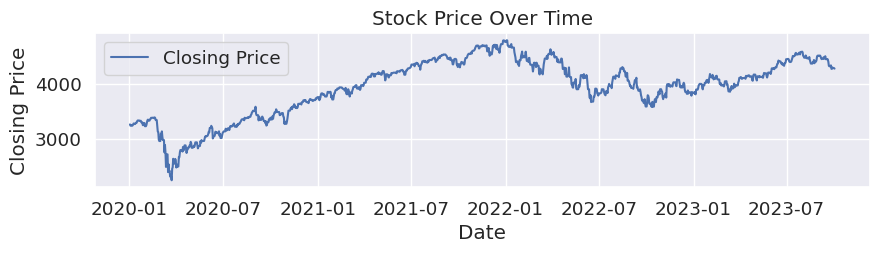

In [58]:
# Plot the closing price over time
plt.figure(figsize=(10, 2))
plt.plot(y, label='Closing Price')
plt.title('Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

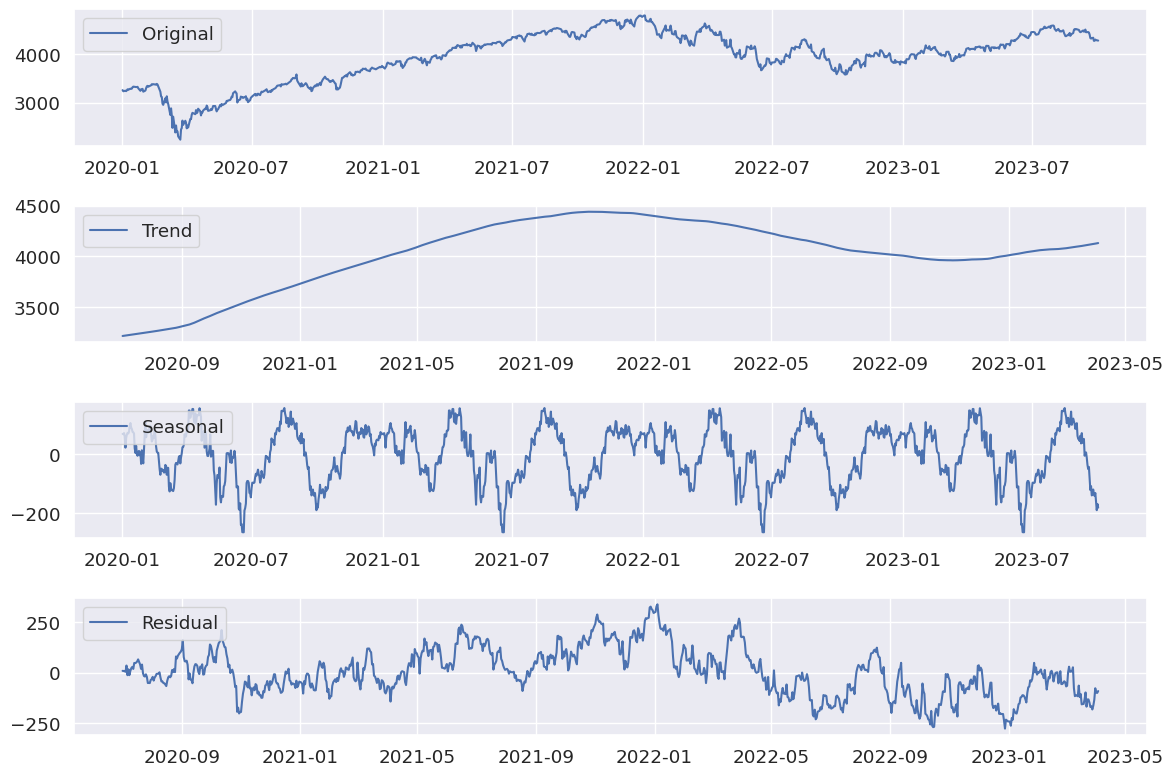

In [59]:
# Decompose the time series to analyze trend, seasonality, and residuals
decomposition = sm.tsa.seasonal_decompose(y, model='additive', period = 365)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the decomposed components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(df['Close'], label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(loc='upper left')
plt.tight_layout()

In [60]:
# Perform Augmented Dickey-Fuller test to check for stationarity
from statsmodels.tsa.stattools import adfuller
result = adfuller(y)
print("ADF Statistic:", result[0],"\n")
print("p-value:", result[1],"\n")
print("Critical Values:", result[4],"\n")

if result[1] <= 0.05:
    print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary","\n")
else:
    print("weak evidence against null hypothesis,indicating it is non-stationary ")

ADF Statistic: -1.6113289065561653 

p-value: 0.47727804562102416 

Critical Values: {'1%': -3.4351852261663867, '5%': -2.863675384893896, '10%': -2.5679068804891} 

weak evidence against null hypothesis,indicating it is non-stationary 


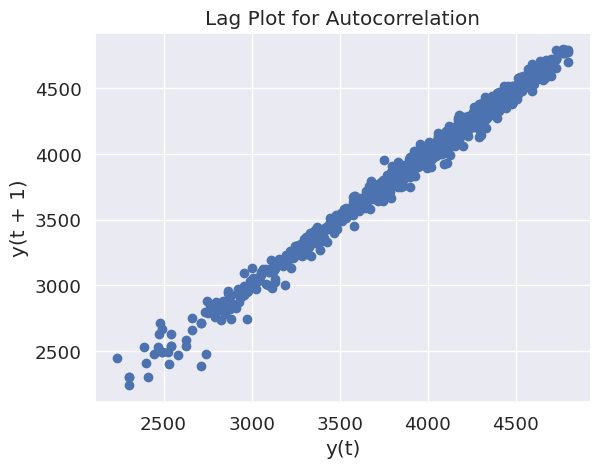

In [61]:
# Create a lag plot to visualize autocorrelation
from pandas.plotting import lag_plot

lag_plot(y)
plt.title('Lag Plot for Autocorrelation')
plt.show()

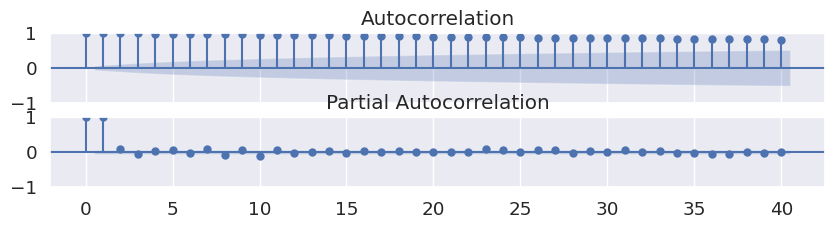

In [62]:
# Perform autocorrelation and partial autocorrelation analysis
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(10, 2))
plt.subplot(211)
plot_acf(df['Close'], lags=40, ax=plt.gca())
plt.subplot(212)
plot_pacf(df['Close'], lags=40, ax=plt.gca())
plt.show()


In [63]:
# To make data stationary
y=y.diff()[1::]

In [64]:
# Perform Augmented Dickey-Fuller test to check for stationarity
from statsmodels.tsa.stattools import adfuller
result = adfuller(y)
print("ADF Statistic:", result[0],"\n")
print("p-value:", result[1],"\n")
print("Critical Values:", result[4],"\n")

if result[1] <= 0.05:
    print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary","\n")
else:
    print("weak evidence against null hypothesis,indicating it is non-stationary ")

ADF Statistic: -9.40612754275182 

p-value: 6.004858589532232e-16 

Critical Values: {'1%': -3.4351852261663867, '5%': -2.863675384893896, '10%': -2.5679068804891} 

strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary 



                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1369
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -7058.047
Date:                Mon, 02 Oct 2023   AIC                          14124.093
Time:                        15:02:18   BIC                          14144.980
Sample:                    01-03-2020   HQIC                         14131.910
                         - 10-02-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7452      1.089      0.684      0.494      -1.390       2.880
ar.L1         -0.1899      0.171     -1.109      0.268      -0.525       0.146
ma.L1          0.0910      0.174      0.522      0.6

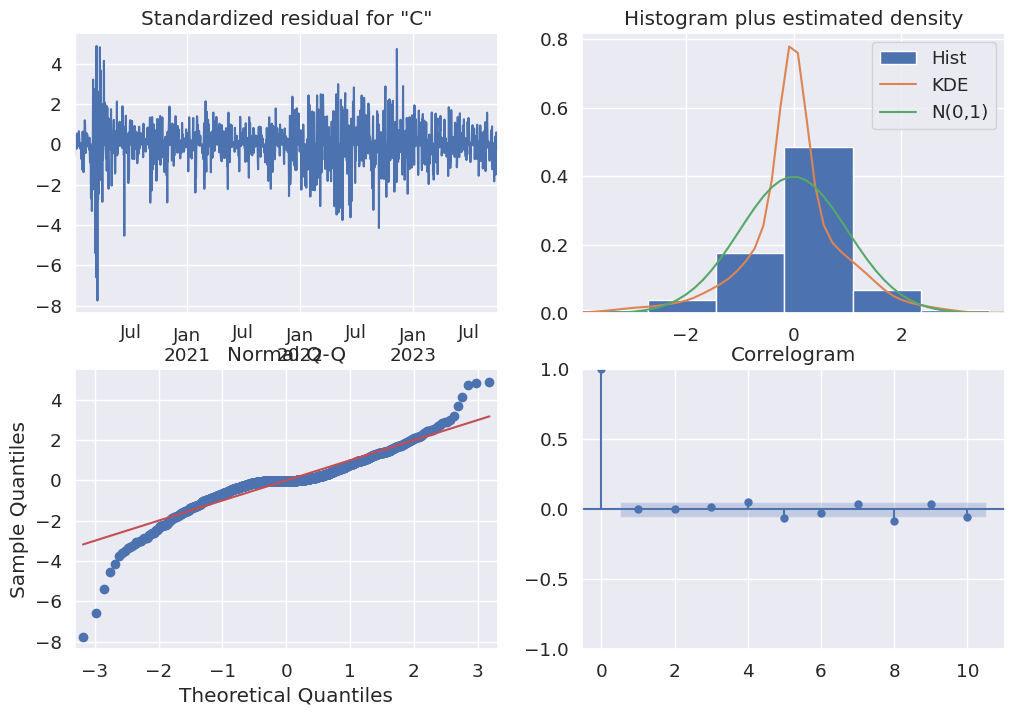

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,3244.669922,3258.139893,3235.530029,3257.850098,3257.850098,3459930000
2020-01-03,3226.360107,3246.149902,3222.340088,3234.850098,3234.850098,3484700000
2020-01-06,3217.550049,3246.840088,3214.639893,3246.280029,3246.280029,3702460000
2020-01-07,3241.860107,3244.909912,3232.429932,3237.179932,3237.179932,3435910000
2020-01-08,3238.590088,3267.070068,3236.669922,3253.050049,3253.050049,3726840000


In [65]:
from statsmodels.tsa.arima.model import ARIMA

p = 1  # AutoRegressive (AR) order
d = 0  # Integration (I) order (differencing)
q = 1  # Moving Average (MA) order

model = ARIMA(y, order=(p, d, q))
model_fit = model.fit()
print(model_fit.summary())
model_fit.plot_diagnostics(figsize=(12, 8))
plt.show()
df.head()

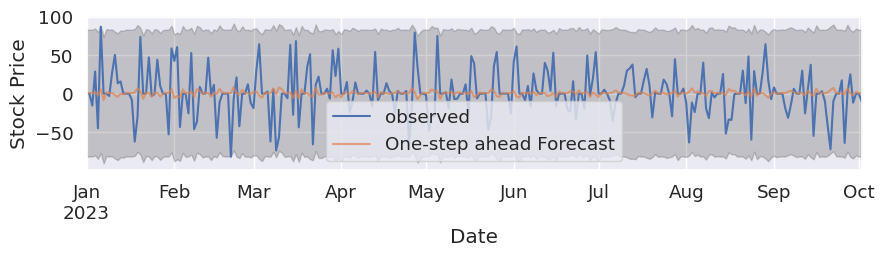

In [66]:
# will plot the actual values with respect to the forecast values.
pred = model_fit.get_prediction(start=pd.to_datetime('2023-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2023':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(10, 2))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Stock Price')
plt.legend()
plt.show()

In [67]:
# Mean Square Error
y_forecasted = pred.predicted_mean
y_truth = y['2023-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

# RMSE
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 836.52
The Root Mean Squared Error of our forecasts is 28.92


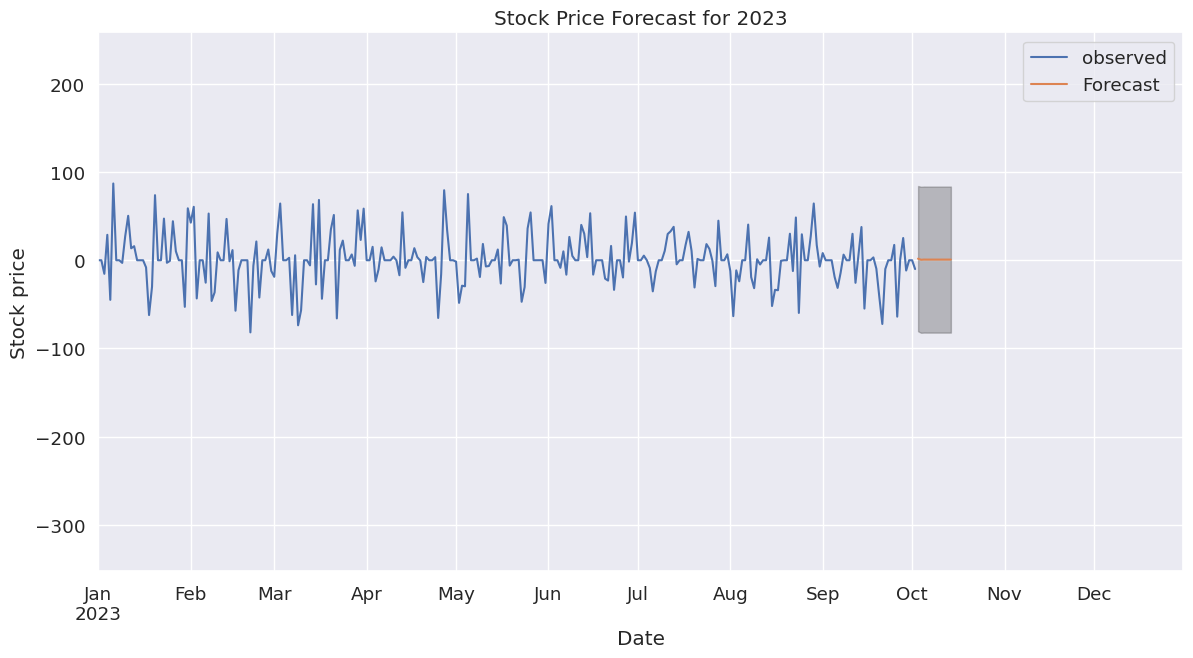

Forecasted Values for 2023:
2023-10-03    1.798835
2023-10-04    0.545192
2023-10-05    0.783211
2023-10-06    0.738020
2023-10-07    0.746600
2023-10-08    0.744971
2023-10-09    0.745281
2023-10-10    0.745222
2023-10-11    0.745233
2023-10-12    0.745231
2023-10-13    0.745231
2023-10-14    0.745231
Freq: D, Name: predicted_mean, dtype: float64


In [68]:
# Get the forecast for 2023 and beyond
pred_uc = model_fit.get_forecast(steps = 12)

# Plot the forecast for 2023 and beyond
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Stock price')
plt.xlim(pd.to_datetime('2023-01-01'), pd.to_datetime('2023-12-31'))  # Set the x-axis limits for 2023
plt.legend()
plt.title('Stock Price Forecast for 2023')
plt.show()

steps_for_2023 = 12  # Assuming monthly data, set to 1 for daily data

# Get the forecast for the next 2 months
pred_uc = model_fit.get_forecast(steps=steps_for_2023)

# Extract and print the forecasted values for 2023
forecasted_values = pred_uc.predicted_mean['2023-01-01':'2023-12-31']  # Adjust date range as needed
print("Forecasted Values for 2023:")
print(forecasted_values)